In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/DatasaurusDozen.csv')
df.head()

name        x        y
0  dino  55.3846  97.1795
1  dino  51.5385  96.0256
2  dino  46.1538  94.4872
3  dino  42.8205  91.4103
4  dino  40.7692  88.3333

In [3]:
df.shape

(1846, 3)

In [4]:
grouped = df.groupby('name')
df1 = grouped.describe()
df1 = pd.DataFrame(
    {
        'count': df1['x']['count'],
        'x_mean': df1['x']['mean'],
        'x_std': df1['x']['std'],
        'y_mean': df1['y']['mean'],
        'y_std': df1['y']['std'],
    }
)
df1 = df1.applymap(lambda x: int(x))
df1

count  x_mean  x_std  y_mean  y_std
name                                           
away          142      54     16      47     26
bullseye      142      54     16      47     26
circle        142      54     16      47     26
dino          142      54     16      47     26
dots          142      54     16      47     26
h_lines       142      54     16      47     26
high_lines    142      54     16      47     26
slant_down    142      54     16      47     26
slant_up      142      54     16      47     26
star          142      54     16      47     26
v_lines       142      54     16      47     26
wide_lines    142      54     16      47     26
x_shape       142      54     16      47     26

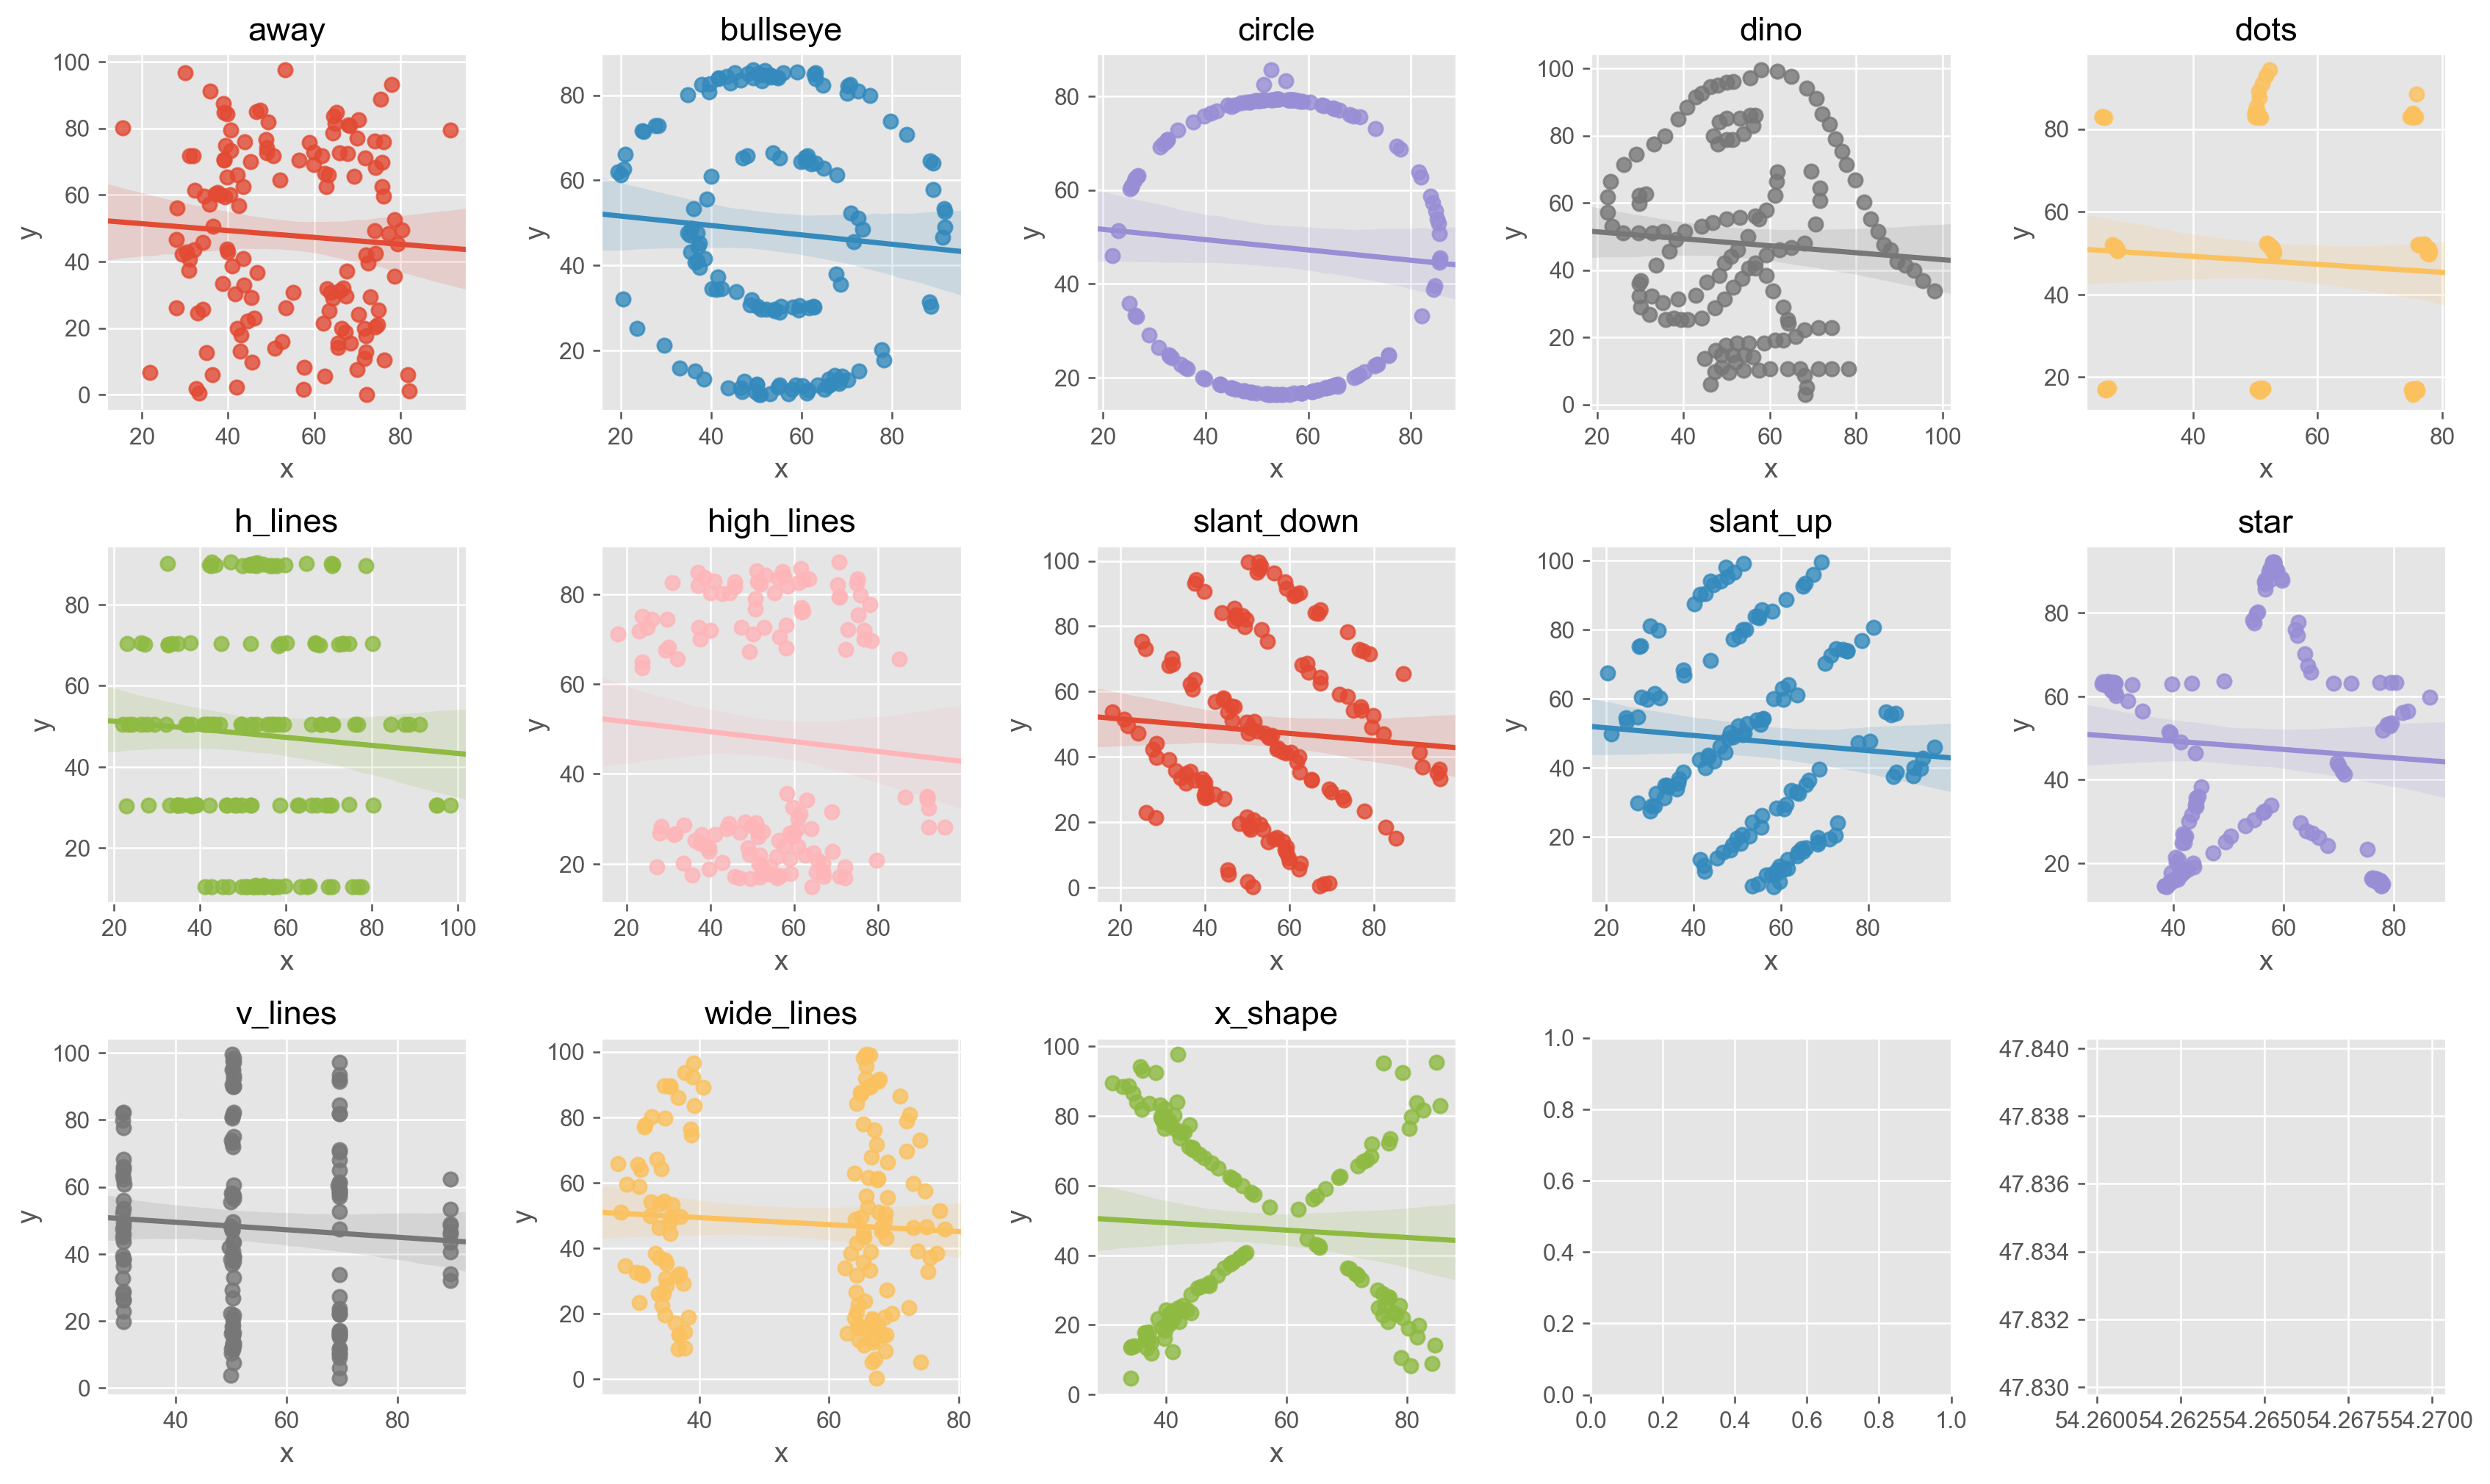

In [5]:
data_names = np.unique(df['name'])
data = []
for name in data_names:
    data.append(df[df['name'] == name])
    
fig, axes = plt.subplots(3, 5, dpi=227, figsize=(15, 9))
for i, (name, ax) in enumerate(zip(data_names, axes.ravel())):
    sns.regplot(data[i]['x'], data[i]['y'], ax=ax)
    ax.set_title(name)
plt.tight_layout()